In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib.pyplot
%pip install folium
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [143]:
%pip install plotly
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat
import folium


In [3]:
# Cargar dataset
df1 = pd.read_csv('2015.csv')
df2 = pd.read_csv('2016.csv')
df3 = pd.read_csv('2017.csv')
df4 = pd.read_csv('2018.csv')
df5 = pd.read_csv('2019.csv')


# Añadir columna de año a cada DataFrame
df1['Year'] = 2015
df2['Year'] = 2016
df3['Year'] = 2017
df4['Year'] = 2018
df5['Year'] = 2019
 
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)


In [4]:

# Inspección inicial
print("\nDataFrame completo shape:", df.shape)
print("\nPrimeras filas del dataset combinado:")
print(df.head())

# Revisar valores nulos
print(df.isnull().sum())



DataFrame completo shape: (782, 20)

Primeras filas del dataset combinado:
  Country or region          Region  Happiness Rank  Score  Standard Error  \
0       Switzerland  Western Europe             1.0  7.587         0.03411   
1           Iceland  Western Europe             2.0  7.561         0.04884   
2           Denmark  Western Europe             3.0  7.527         0.03328   
3            Norway  Western Europe             4.0  7.522         0.03880   
4            Canada   North America             5.0  7.427         0.03553   

   GDP per capita  Social support  Healthy life expectancy  \
0         1.39651         1.34951                  0.94143   
1         1.30232         1.40223                  0.94784   
2         1.32548         1.36058                  0.87464   
3         1.45900         1.33095                  0.88521   
4         1.32629         1.32261                  0.90563   

   Freedom to make life choices  Perceptions of corruption  Generosity  \
0       

In [5]:

# Seleccionamos más columnas relevantes
columnas_usar = [
    "Country or region",
    "Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "Year"
]
df = df[columnas_usar].copy()

# Renombramos para que estén uniformes
df = df.rename(columns={
    "Score": "Happiness_score",
    "GDP per capita": "gdp_per_capita",
    "Social support": "social_support", 
    "Healthy life expectancy": "life_expectancy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption",
    "Country or region": "country",
    "Year": "year"
})

df

,country,Happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...
777,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
778,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
779,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019
780,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019


In [6]:

# Antes de eliminar valores nulos, veamos cuántos vamos a eliminar
filas_antes = len(df)
columnas_antes = df.shape[1]

print(f"Dataset antes de limpieza: {filas_antes} filas, {columnas_antes} columnas")
print(f"Valores nulos totales: {df.isnull().sum().sum()}")

# Eliminar filas con valores nulos
df = df.dropna()
# Ver todas las columnas disponibles
print("Columnas en el dataset:")
print(df.columns.tolist())

filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nDespués de dropna(): {filas_despues} filas")
print(f"Filas eliminadas: {filas_eliminadas}")
print(f"Porcentaje de datos mantenidos: {(filas_despues/filas_antes)*100:.2f}%")


# Guardar versión limpia
df

Dataset antes de limpieza: 782 filas, 9 columnas
Valores nulos totales: 1
Columnas en el dataset:
['country', 'Happiness_score', 'gdp_per_capita', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption', 'year']

Después de dropna(): 781 filas
Filas eliminadas: 1
Porcentaje de datos mantenidos: 99.87%


,country,Happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...
777,Rwanda,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
778,Tanzania,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
779,Afghanistan,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,2019
780,Central African Republic,3.083,0.02600,0.00000,0.10500,0.22500,0.23500,0.03500,2019


## Análisis exploratorio del dataset limpio

In [7]:
# 🔍 Exploración inicial
# ------------------------------------------
print("Dimensiones del dataset:", df.shape)
print("\nColumnas:", df.columns)
print("\nPrimeras filas:")
display(df.head())

# Estadísticas generales
print("\nEstadísticas descriptivas:")
display(df.describe(include="all"))

# Revisar número de países y rango de años
print("\nNúmero de países:", df['country'].nunique())
print("Años disponibles:", df['year'].unique())



Dimensiones del dataset: (781, 9)

Columnas: Index(['country', 'Happiness_score', 'gdp_per_capita', 'social_support',
       'life_expectancy', 'freedom', 'generosity', 'corruption', 'year'],
      dtype='object')

Primeras filas:


,country,Happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015



Estadísticas descriptivas:


,country,Happiness_score,gdp_per_capita,social_support,life_expectancy,freedom,generosity,corruption,year
count,781,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
unique,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.377232,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436,2016.992318
std,NaN,1.127071,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816,1.417814
min,NaN,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,NaN,4.509000,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000,2016.000000
50%,NaN,5.321000,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000,2017.000000
75%,NaN,6.182000,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030,2018.000000



Número de países: 170
Años disponibles: [2015 2016 2017 2018 2019]


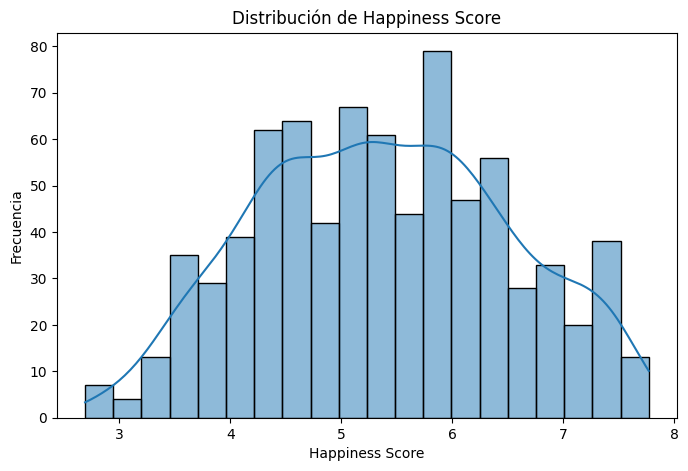

In [8]:
# ------------------------------------------
# Distribución de la felicidad
# ------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Happiness_score"], bins=20, kde=True)
plt.title("Distribución de Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frecuencia")
plt.show()

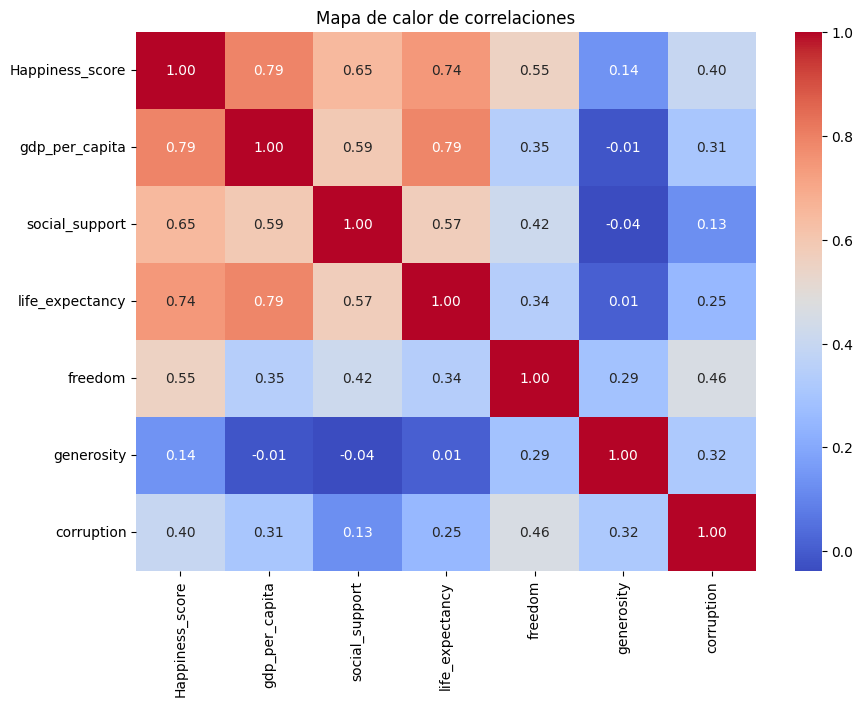

In [9]:
# Correlaciones entre todas las variables
# ------------------------------------------
plt.figure(figsize=(10,7))
sns.heatmap(df[['Happiness_score','gdp_per_capita','social_support',
                'life_expectancy','freedom','generosity','corruption']]
            .corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


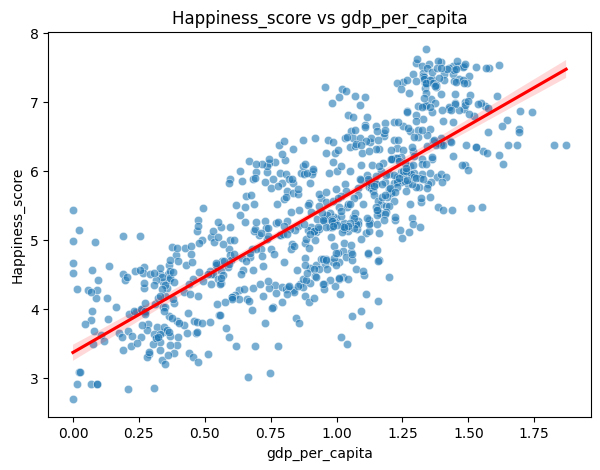

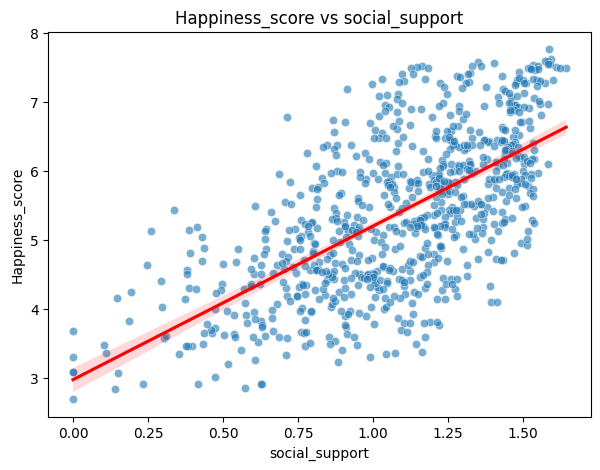

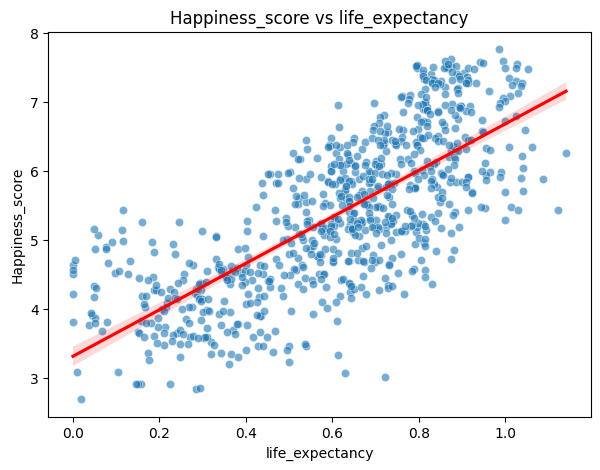

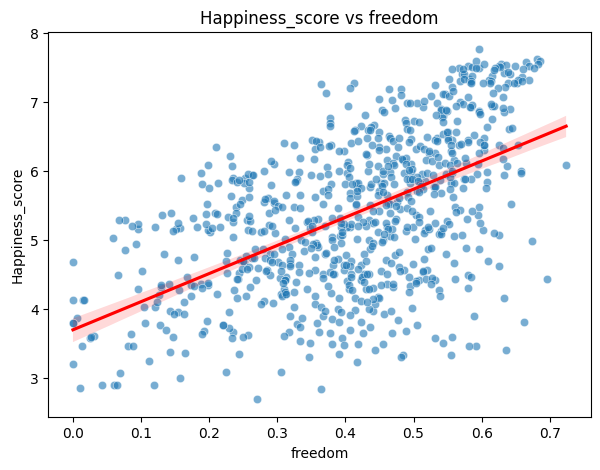

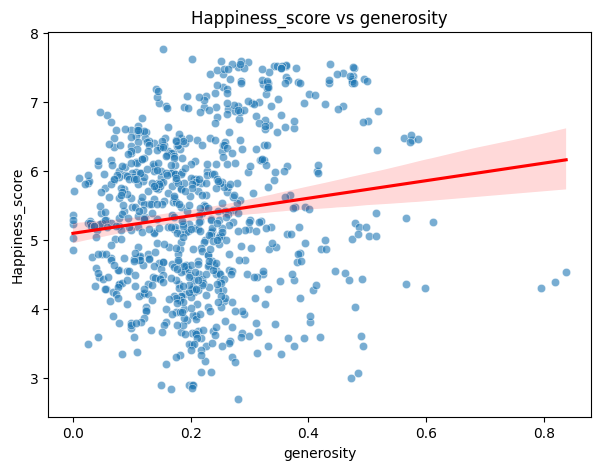

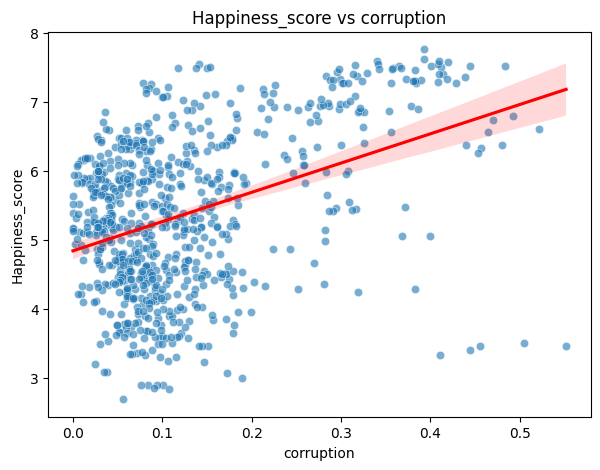

In [10]:
# Relación de cada variable con la felicidad
# ------------------------------------------
features = ['gdp_per_capita','social_support','life_expectancy',
            'freedom','generosity','corruption']

for col in features:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=col, y="Happiness_score", alpha=0.6)
    sns.regplot(data=df, x=col, y="Happiness_score", scatter=False, color="red")
    plt.title(f"Happiness_score vs {col}")
    plt.show()


C:\Users\USER01\AppData\Local\Temp\ipykernel_23020\971997266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="Happiness_score", y="country", palette="viridis")


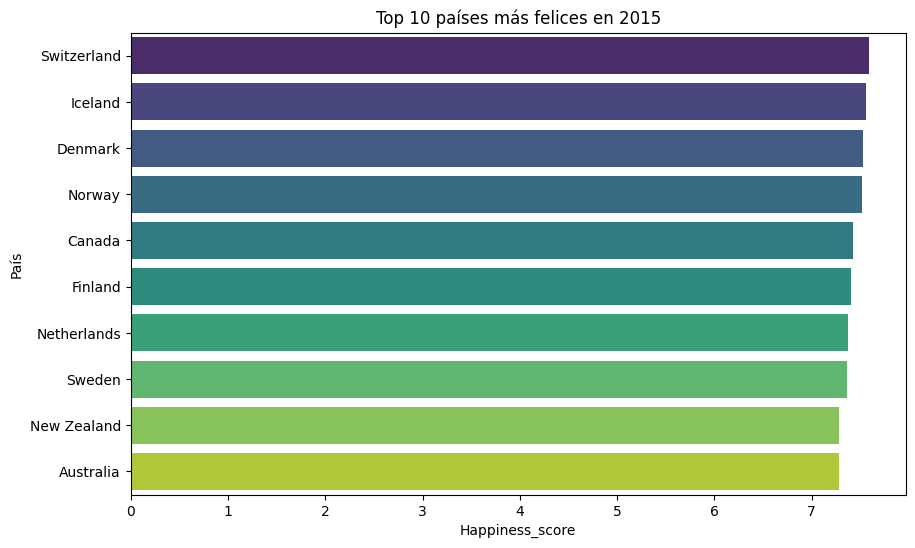

C:\Users\USER01\AppData\Local\Temp\ipykernel_23020\971997266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="Happiness_score", y="country", palette="viridis")


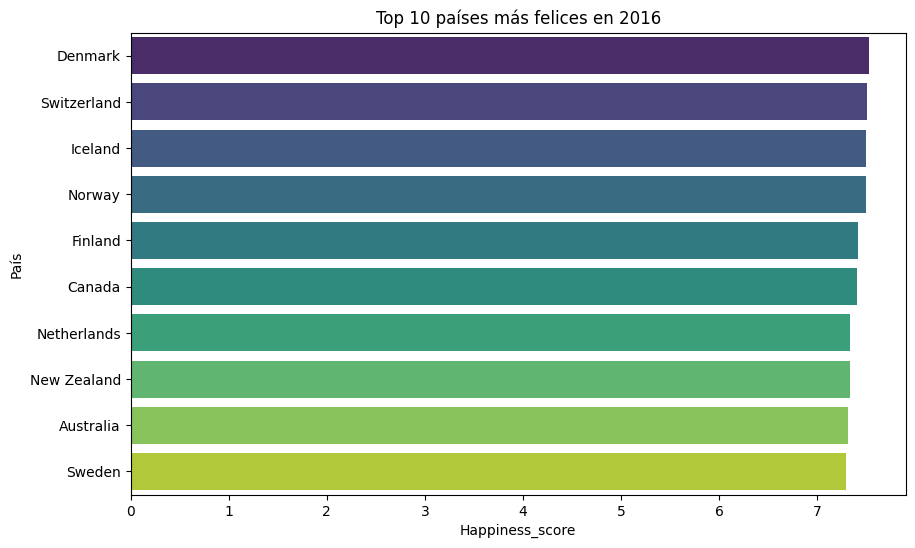

C:\Users\USER01\AppData\Local\Temp\ipykernel_23020\971997266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="Happiness_score", y="country", palette="viridis")


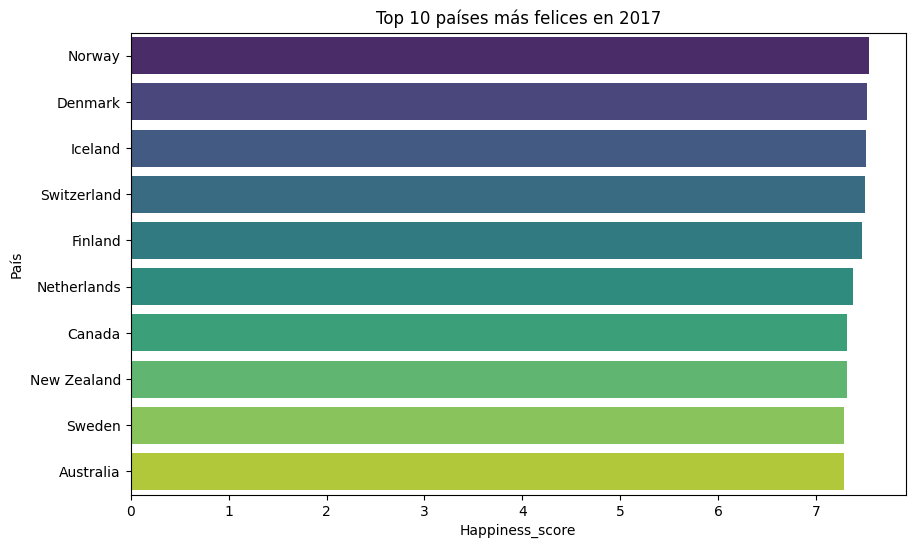

C:\Users\USER01\AppData\Local\Temp\ipykernel_23020\971997266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="Happiness_score", y="country", palette="viridis")


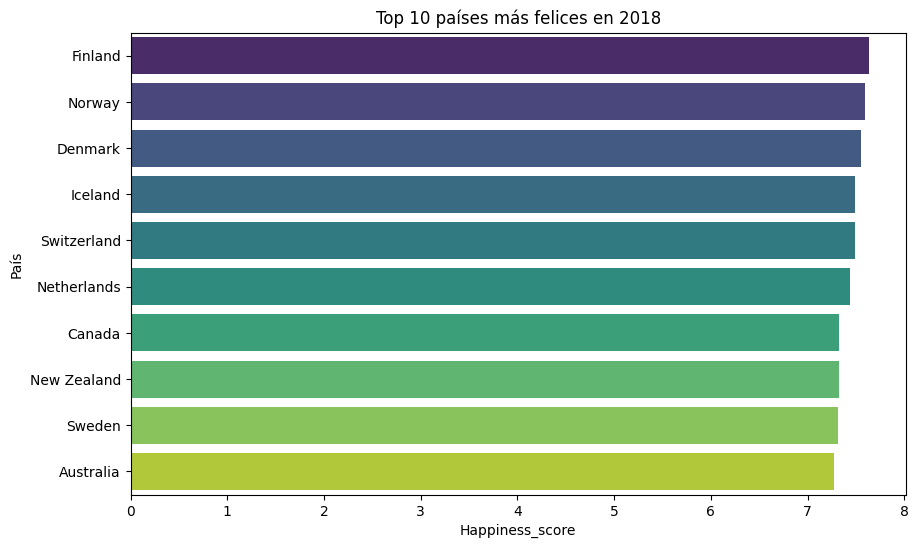

C:\Users\USER01\AppData\Local\Temp\ipykernel_23020\971997266.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x="Happiness_score", y="country", palette="viridis")


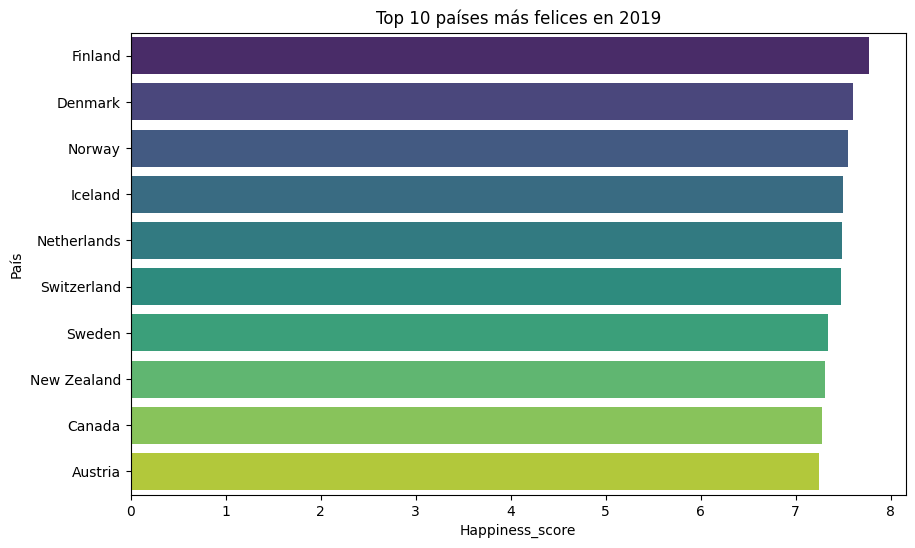

In [11]:
# Top 10 países más felices por año
# ------------------------------------------
for year in sorted(df["year"].unique()):
    subset = df[df["year"] == year].nlargest(10, "Happiness_score")
    
    plt.figure(figsize=(10,6))
    sns.barplot(data=subset, x="Happiness_score", y="country", palette="viridis")
    plt.title(f"Top 10 países más felices en {year}")
    plt.xlabel("Happiness_score")
    plt.ylabel("País")
    plt.show()

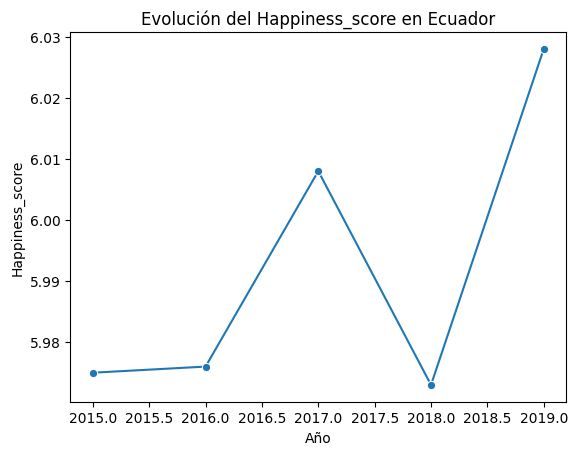

In [12]:
# Evolución temporal de un país
# ------------------------------------------
pais = "Ecuador"  
subset = df[df["country"] == pais]

sns.lineplot(data=subset, x="year", y="Happiness_score", marker="o")
plt.title(f"Evolución del Happiness_score en {pais}")
plt.xlabel("Año")
plt.ylabel("Happiness_score")
plt.show()

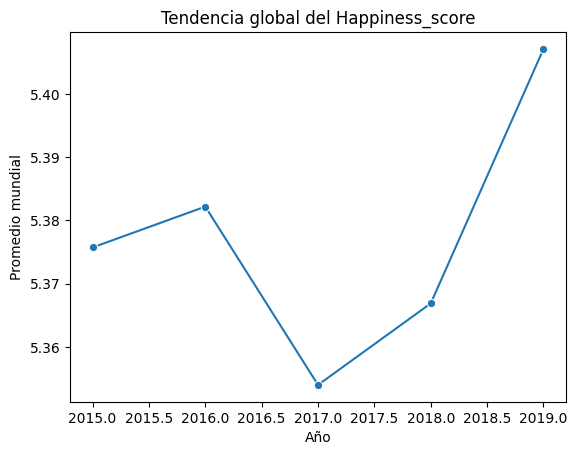

In [13]:
# Tendencia global (promedio mundial por año)
# ------------------------------------------
global_trend = df.groupby("year")["Happiness_score"].mean().reset_index()

sns.lineplot(data=global_trend, x="year", y="Happiness_score", marker="o")
plt.title("Tendencia global del Happiness_score")
plt.xlabel("Año")
plt.ylabel("Promedio mundial")
plt.show()

## 3. Visualización de datos Deberán generarse gráfico

In [14]:
# 1. Mapa de calor mundial de felicidad (Plotly)
# ------------------------------------------
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="Happiness_score",
    hover_name="country",
    animation_frame="year",
    color_continuous_scale=px.colors.sequential.Viridis,
    title="World Happiness Score por país (con animación por año)"
)
fig.show()

C:\Users\USER01\AppData\Local\Temp\ipykernel_23020\3477313493.py:3: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


In [15]:
# 2. Gráfica interactiva: PIB vs Felicidad
# ------------------------------------------
fig = px.scatter(
    df,
    x="gdp_per_capita",
    y="Happiness_score",
    color="region" if "region" in df.columns else "year",
    size="life_expectancy",
    hover_name="country",
    animation_frame="year",
    title="Relación entre PIB per cápita y Felicidad (animado por año)"
)
fig.show()

In [16]:
# 3. Evolución temporal de los top 10 países
# ------------------------------------------
top_countries = df.groupby("country")["Happiness_score"].mean().nlargest(10).index
subset = df[df["country"].isin(top_countries)]

fig = px.line(
    subset,
    x="year",
    y="Happiness_score",
    color="country",
    markers=True,
    title="Evolución temporal de los 10 países más felices"
)
fig.show()

In [26]:
# 4. Mapa interactivo con Folium
# ------------------------------------------
latest_year = df["year"].max()
latest_data = df[df["year"] == latest_year]

# Crear mapa centrado en el mundo
world_map = folium.Map(location=[20,0], zoom_start=2)

# Añadir círculos
for _, row in latest_data.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]] if "latitude" in df.columns else [0,0],
        radius=row["Happiness_score"],
        color="blue",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['country']}: {row['Happiness_score']}"
    ).add_to(world_map)

# Guardar mapa
world_map.save("happiness_map.html")
print("🌍 Mapa guardado en happiness_map.html")

🌍 Mapa guardado en happiness_map.html


## Implementación de análisis de Machine Learning con scikit-learn

In [17]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:

# ------------------------------------------
#  Selección de features
# Excluimos 'country' (categórico) y 'year' (no lo usamos en esta versión)
# ------------------------------------------
X = df[['gdp_per_capita','social_support','life_expectancy','freedom','generosity','corruption']]
y = df['Happiness_score']

# ------------------------------------------
#  Dividir en entrenamiento y prueba
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------
#  Modelo de Regresión Lineal
# ------------------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Modelo: Regresión Lineal")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}\n")


Modelo: Regresión Lineal
Mean Squared Error: 0.32
R² Score: 0.75



In [20]:
# ------------------------------------------
#  Modelo Random Forest Regressor
# ------------------------------------------
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Modelo: Random Forest")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}\n")


🌲 Modelo: Random Forest
Mean Squared Error: 0.25
R² Score: 0.80



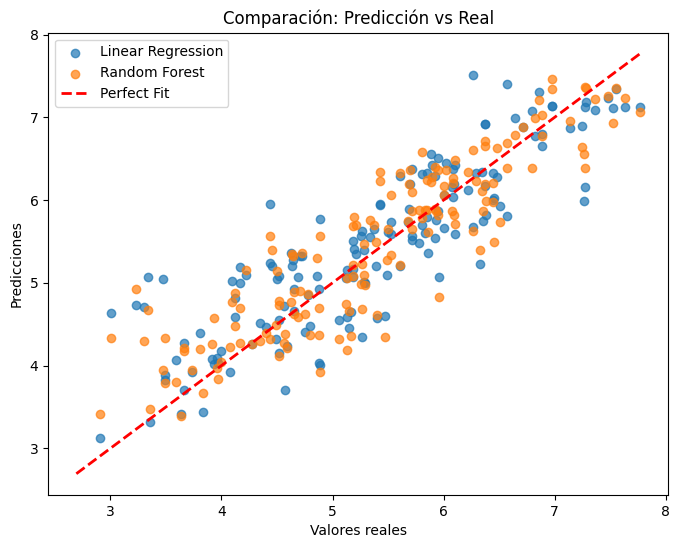

In [21]:
# ------------------------------------------
# Comparación visual: Real vs Predicho
# ------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación: Predicción vs Real")
plt.legend()
plt.show()

C:\Users\USER01\AppData\Local\Temp\ipykernel_23020\928807203.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




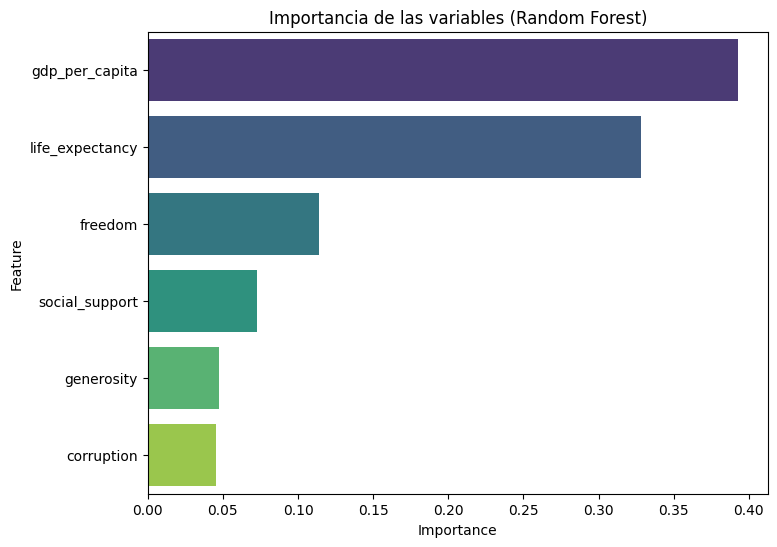

,Feature,Importance
0,gdp_per_capita,0.392922
2,life_expectancy,0.327930
3,freedom,0.113867
1,social_support,0.072893
4,generosity,0.047204
5,corruption,0.045185


In [22]:
# ------------------------------------------
# Importancia de variables (Random Forest)
# ------------------------------------------
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=importances, palette="viridis")
plt.title("Importancia de las variables (Random Forest)")
plt.show()

display(importances)